#### Import all librarry

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import math
import re
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

# Data Reading

#### Read both train and test data

In [91]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
col = ['Pclass', 'Sex', 'Embarked', 'Survived']

for i in range(len(col)):
    df_train[col[i]] = df_train[col[i]].astype('category')
    if col[i] in df_test.columns:
        df_test[col[i]] = df_test[col[i]].astype('category')

# EDA

#### 1. Where is the passenger departure port located? 

Text(0.5, 1.0, 'C = Cherbourgh, Q = Queenstown, S = Southampton')

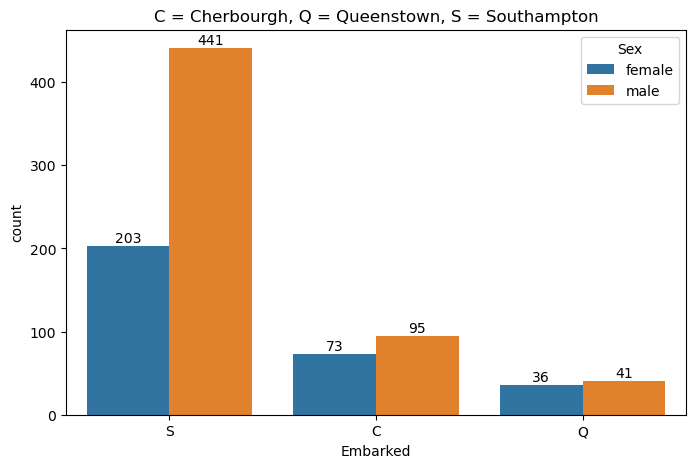

In [94]:
# Set fig size
plt.figure(figsize=(8,5)) #Width, High

# Create count plot
ax = sns.countplot(data=df_train, x='Embarked', hue='Sex', order=['S','C','Q'])

# Get plot data (e.g. high, width etc.)
for p in ax.patches:
    # Determining text position
    ax.text(p.get_x() + p.get_width() / 2,  # X position (middle of bar)
            p.get_height() + 4,             # Y Position (Above bar + 2)
            int(p.get_height()),            # The number show
            ha='center')
    
plt.title('C = Cherbourgh, Q = Queenstown, S = Southampton')

More than half of Titanic passenger embarked from southampton port for both male and female

#### 2. How much people traveling by themself?

In [95]:
df_eda = df_train.copy()
df_eda['Alone'] = df_eda['SibSp'] + df_eda['Parch']

count = 0
for i in range(len(df_eda)):
    if df_eda['Alone'][i] == 0:
        count += 1

print(f'People who travel alone are {count} peoples')

People who travel alone are 537 peoples


#### 3. Age range titanic passenger 

In [96]:
df_eda['Age_range'] = df_eda['Age'].map(lambda x : 'Child' if 0 <= x <= 10 else 'Teenager' if 11 <= x <= 25
                                        else 'Adult' if 26 <= x <= 40 else 'Old')

df_eda['Age_range'] = df_eda['Age_range'].astype('category')

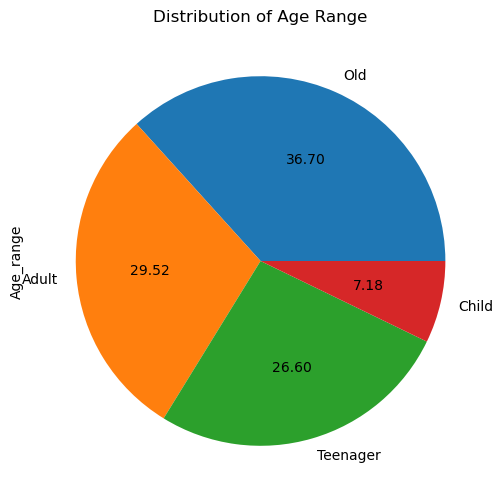

In [97]:
plt.figure(figsize=(6,6))
# Create pie plot
df_eda['Age_range'].value_counts().plot.pie(autopct='%.2f')
plt.title('Distribution of Age Range')
plt.show()

The Titanic pessenger were dominated by old people, which make sense because they have more money than other age group.

#### 4. Correlation between age and ticket price

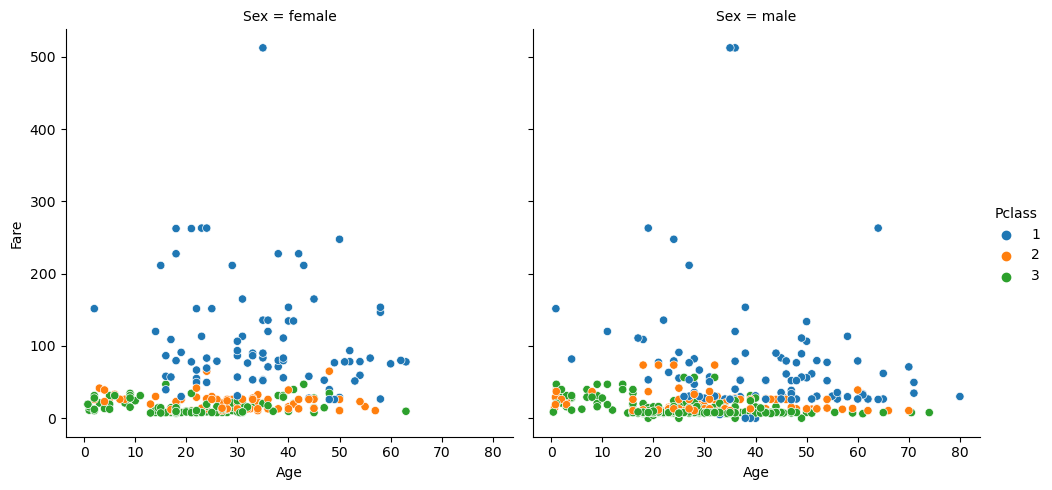

In [98]:
# Relplot for correlation plot, catplot for categgorical plot
sns.relplot(
    data=df_eda,
    x='Age',
    y='Fare',
    kind='scatter',
    hue='Pclass',
    col='Sex'
    # Split paremeter only available in cat plot
    #split = True
)

Calculate Pearson Correlation Coefficient to know the exact correlation between Fare and Age coulmn

Formula for Pearson Correlation Coefficient:

(-0.5, 404.5, 166.5, -0.5)

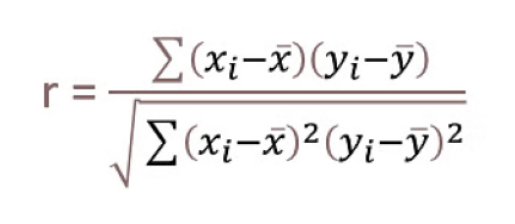

In [99]:
img = mpimg.imread("pearson correlation variation.png")
plt.imshow(img)
plt.axis('off')

Where:
- r = Pearson Correlation Coefficient (covariance / standard deviation X * standard deviation y)
- Xi, yi = value of X and y
- X_bar, y_bar = mean of X and y respectively

In [100]:
# Caculate covariance
df_cov = df_train[['Age', 'Fare']]
df_cov.dropna(inplace=True)

# Get both age and fare means
age_mean = sum(df_cov['Age']) / len(df_cov)
fare_mean = sum(df_cov['Fare']) / len(df_cov)

# Substract all value form it's means
df_cov['Age_sub'] = df_cov['Age'] - age_mean
df_cov['Fare_sub'] = df_cov['Fare'] - fare_mean

# Get covariance
covariance = sum(df_cov['Age_sub'] * df_cov['Fare_sub']) / len(df_cov)-1 # We assume we have only sample data

In [101]:
# Get Fare and Age standard deviation
age_stdv = np.std(df_cov['Age'])
fare_stdv = np.std(df_cov['Fare'])

In [102]:
# Calculate pearson correlation coefficient
pearson = covariance/(age_stdv*fare_stdv)
print(f'Pearson Correlation Coefficient between Fare and Age columns is: {pearson}')

Pearson Correlation Coefficient between Fare and Age columns is: 0.09476401483606335


Female tend to pay more for higher class as titanic passenger. If we look back to our data, some peoples in first class can even have more than one cabin. Women can feel more secure and private with more than one room for different activities.
For addition, theres no correlation between how old someone with how much price they paid.

#### 5. Is there any statistical evidence that people who survive is more than poeple who not

Assuming we only have sample data (we not including test data in this analysis), sinlge mean, and we dont know its population variance.

From these assumption, we can get:
- Null hypothesis: H0 : n survived <= n not survived (Hypothesized mean = 0.5)
- Alternative hypothesis H1 : n survived > n not survived
- One tailed test
- Significant level at 95% (z-table value = 1.654)

(-0.5, 426.5, 231.5, -0.5)

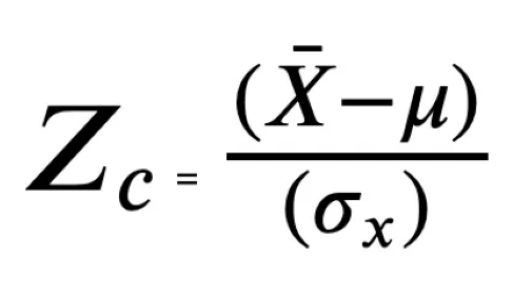

In [103]:
z = mpimg.imread("Z-score formula.png")
plt.imshow(z)
plt.axis('off')

Where:
- Zc : Z-score
- $\bar{X}$ : Sample proportion
- $\mu$ (p_0) : Hypotize true means
- $\sigma$ : Standard error

In [104]:
z_table = 1.654
p_0 = 0.5
# Total observation data
n = len(df_train['Survived'])
# Get sample proportion
x_hat = sum(df_train['Survived'])/n

z_score = (x_hat - p_0) / np.sqrt((p_0 * (1-p_0)) / n)

if np.abs(z_score) <= z_table:
    print(f"z_score ({round(np.abs(z_score), 2)}) is smaller or equal than z_table ({z_table}), hence fail to reject null hypothesis, "
          "or there's no statistical evidence that people who survived more than not survived")
else :
    print(f"z_score ({round(np.abs(z_score), 2)}) is bigeer than z_table ({z_table}), hence we reject null hypothesis, "
          "or there's statistical evidence that people who survived more than not survived")

z_score (6.93) is bigeer than z_table (1.654), hence we reject null hypothesis, or there's statistical evidence that people who survived more than not survived


# Data Preparation

### General information about data

In [36]:
print(df_train.info(), '/n')
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.8+ KB
None /n


,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
print(df_test.info(), '/n')
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 27.9+ KB
None /n


,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,30.272590,0.447368,0.392344,35.627188
std,120.810458,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


Almost all column (except Age column in train data) have skew in their istribution, it can be a problem in some machine learning model. Also there is a possibility that there are outliers in Fare column. 

### Handling missing value and unnecessary column

Name and PassengerID columns doesn't give us useful information. Both columns will be dropped

In [38]:
df_train.drop(['PassengerId', 'Name'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [39]:
print((df_train.isnull().sum()/df_train.shape[0])*100)
print()
print((df_test.isnull().sum()/df_train.shape[0])*100)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

Pclass       0.000000
Sex          0.000000
Age          9.652076
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.112233
Cabin       36.700337
Embarked     0.000000
dtype: float64


Missing value in age column

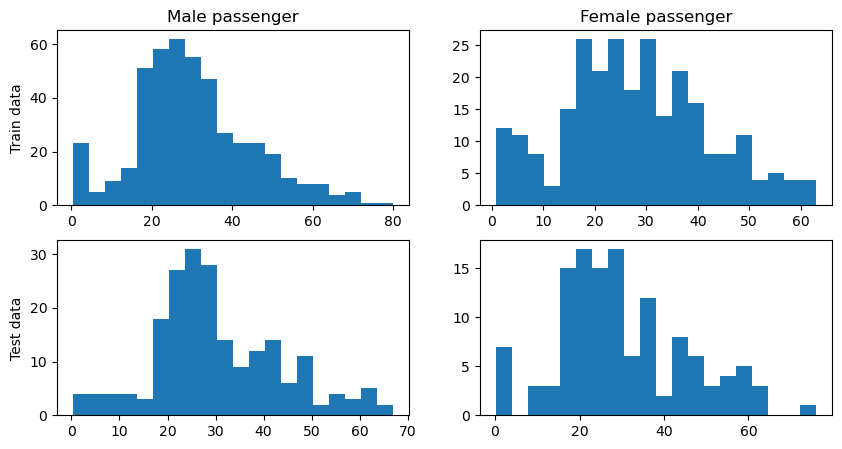

In [40]:
male_train = df_train[df_train['Sex'] == 'male']
female_train = df_train[df_train['Sex'] == 'female']
male_test = df_test[df_test['Sex'] == 'male']
female_test = df_test[df_test['Sex'] == 'female']

fig, ax = plt.subplots(2, 2)

ax[0, 0].hist(male_train['Age'], bins=20)
ax[0, 0].set_title('Male passenger')
ax[0, 0].set_ylabel('Train data')

ax[0, 1].hist(female_train['Age'], bins=20)
ax[0, 1].set_title('Female passenger')

ax[1, 0].hist(male_test['Age'], bins=20)
ax[1, 0].set_ylabel('Test data')

ax[1, 1].hist(female_test['Age'], bins=20)

fig.set_figheight(5)
fig.set_figwidth(10)

Except female in test data, the rest of the data have normal distribution. So it's save to use mean to replace missing value in the data with normal distribution, and median for non nomatl distribution (skew data in test data)

In [41]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

Missing value in embarked column

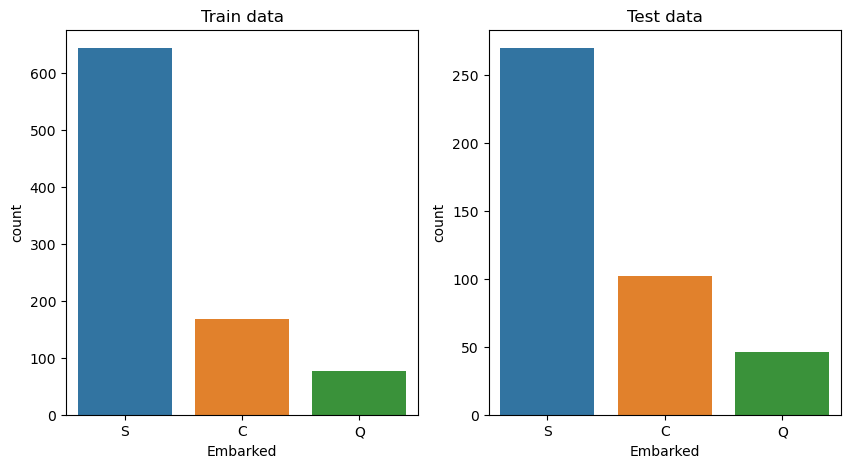

In [42]:
order = ['S', 'C', 'Q']

fig, ax = plt.subplots(1, 2)

sns.countplot(x='Embarked', data=df_train, ax=ax[0], order=order)
ax[0].set_title('Train data')

sns.countplot(x='Embarked', data=df_test, ax=ax[1], order=order)
ax[1].set_title('Test data')

fig.set_figheight(5)
fig.set_figwidth(10)

In [43]:
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])

Missing value in fare column (data test)

In [44]:
df_test[df_test['Fare'].isnull()]['Pclass']

152    3
Name: Pclass, dtype: category
Categories (3, int64): [1, 2, 3]

<Axes: xlabel='Fare', ylabel='Count'>

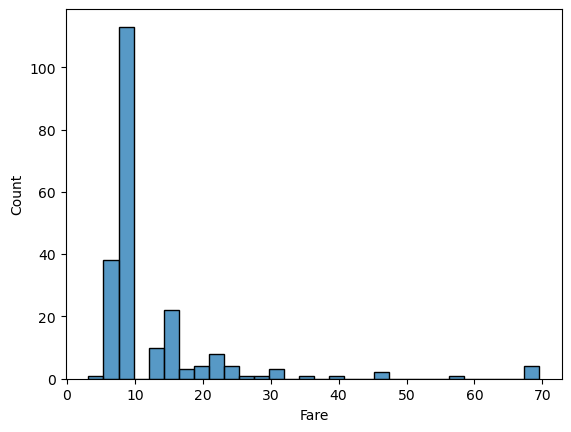

In [45]:
sns.histplot(data=df_test[df_test['Pclass'] == 3], x='Fare')

In [46]:
med = df_test[df_test['Pclass'] == 3]['Fare'].median()
df_test['Fare'] = df_test['Fare'].fillna(med)

### Feature Engineering

Separate ticket column into ticket number and ticket ID

In [47]:
def extract (ticket):
    items = ticket.split()
    if items[-1].isdigit():
        return items[-1]
    return 0

In [48]:
df_train['Ticket_number'] = df_train['Ticket'].apply(extract)
df_test['Ticket_number'] = df_test['Ticket'].apply(extract)

df_train['Ticket_number'] = df_train['Ticket_number'].astype('int64')
df_test['Ticket_number'] = df_test['Ticket_number'].astype('int64')

df_train.drop('Ticket', inplace=True, axis=1)
df_test.drop('Ticket', inplace=True, axis=1)

Take first cabin nuber, and separate its's number from it's letter 

In [49]:
def sep_cabin(cabin):
    if pd.notna(cabin):
        item = cabin.split()[0]
        numbers = re.findall(r'\d+', item)
        letters = re.findall(r'[a-zA-Z]', item)
        number = numbers[0] if numbers else 0
        letter = letters[0] if numbers else 'unknown'
        return number, letter
    return 0, 'unknown'

In [50]:
df_train[['Cabin_num', 'Cabin_let']] = df_train['Cabin'].apply(lambda x : pd.Series(sep_cabin(x)))
df_test[['Cabin_num', 'Cabin_let']] = df_test['Cabin'].apply(lambda x : pd.Series(sep_cabin(x)))

df_train['Cabin_num'] = df_train['Cabin_num'].astype('int64')
df_test['Cabin_num'] = df_test['Cabin_num'].astype('int64')

df_train['Cabin_let'] = df_train['Cabin_let'].astype('str')
df_test['Cabin_let'] = df_test['Cabin_let'].astype('str')

df_train.drop('Cabin', inplace=True, axis=1)
df_test.drop('Cabin', inplace=True, axis=1)

### Handling ouitlier

Fare column

<Axes: ylabel='Fare'>

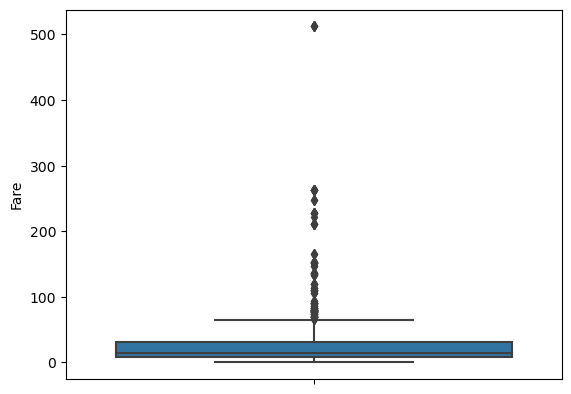

In [51]:
sns.boxplot(data=df_train, y='Fare')


In [52]:
df_train = df_train[df_train['Fare'] < 300]

### Checking target column imbalance

In [53]:
df_train['Survived'].value_counts()

0    549
1    339
Name: Survived, dtype: int64

<Axes: ylabel='Survived'>

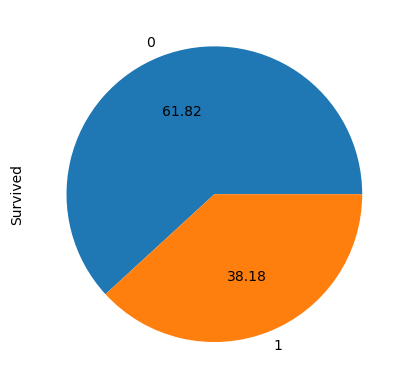

In [54]:
df_train['Survived'].value_counts().plot.pie(autopct='%.2f')

Using SMOTE to add random data in minority class

In [55]:
from sklearn.utils import shuffle

np.random.seed(64)

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

col = df_train.columns[1:]
col_list = col.to_list()

ros = RandomOverSampler(sampling_strategy='not majority')
X_res, y_res = ros.fit_resample(X, y)

df_balance = pd.DataFrame(X_res, columns=col_list)
df_balance['Survived'] = y_res

# Shuffling data to avoid oversamplin
df_balance = shuffle(df_balance, random_state=64).reset_index(drop=True)

<Axes: ylabel='Survived'>

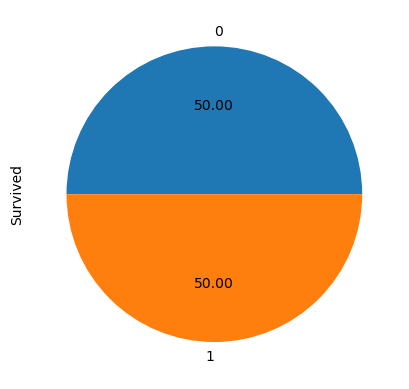

In [56]:
df_balance['Survived'].value_counts().plot.pie(autopct='%.2f')

In [57]:
df_balance.iloc[900:]['Survived'].nunique()

2

### Convert Pclass and Survived columns data type

### Applying One Hot Encoding to string column

In [58]:
train_one_hot = pd.get_dummies(df_balance[['Sex', 'Embarked', 'Cabin_let']], drop_first=True)
test_one_hot = pd.get_dummies(df_test[['Sex', 'Embarked', 'Cabin_let']], drop_first=True)

train = df_balance.drop(['Sex', 'Embarked', 'Cabin_let'], axis=1)
test = df_test.drop(['Sex', 'Embarked', 'Cabin_let'], axis=1)

data_train = train.join(train_one_hot)
data_test = test.join(test_one_hot)

# Machine Learning Model

### 1. Logistic Regression

In [59]:
data_train_log = data_train.copy()
data_test_log = data_test.copy()

#### Model evaluation

- Target must be binomial (categorical)

In [60]:
data_train_log['Survived'].nunique()

2

- Multicollinearity

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif_data = pd.DataFrame()
vif_data['feature'] = data_train_log.columns

vif_data['VIF'] = [variance_inflation_factor(data_train_log.values, i)
                   for i in range(data_train_log.shape[1])]

print(vif_data)

              feature        VIF
0              Pclass  23.760464
1                 Age   6.227810
2               SibSp   1.626756
3               Parch   1.643096
4                Fare   3.486992
5       Ticket_number   1.344198
6           Cabin_num   4.631487
7            Survived   2.847040
8            Sex_male   3.357205
9          Embarked_Q   1.636079
10         Embarked_S   5.217449
11        Cabin_let_B   3.341006
12        Cabin_let_C   5.435087
13        Cabin_let_D   2.152435
14        Cabin_let_E   2.436218
15        Cabin_let_F   1.432351
16        Cabin_let_G   1.172969
17  Cabin_let_unknown  31.063824


In [63]:
data_train_log.drop('Cabin_let_unknown', axis=1, inplace=True)
data_test_log.drop('Cabin_let_unknown', axis=1, inplace=True)

In [64]:
vif_data = pd.DataFrame()
vif_data['feature'] = data_train_log.columns

vif_data['VIF'] = [variance_inflation_factor(data_train_log.values, i)
                   for i in range(data_train_log.shape[1])]

print(vif_data)

          feature       VIF
0          Pclass  8.535141
1             Age  5.507286
2           SibSp  1.626746
3           Parch  1.643059
4            Fare  3.277616
5   Ticket_number  1.330474
6       Cabin_num  4.573520
7        Survived  2.582339
8        Sex_male  3.267057
9      Embarked_Q  1.630081
10     Embarked_S  4.830740
11    Cabin_let_B  2.441810
12    Cabin_let_C  4.294728
13    Cabin_let_D  1.468218
14    Cabin_let_E  1.651279
15    Cabin_let_F  1.065095
16    Cabin_let_G  1.024242


- Linearity of the logit over the continuous covariates using Box-Tidwell Test

In [65]:
data_train_lt = data_train_log.copy()
data_train_lt = data_train_lt[['Fare', 'Age', 'Ticket_number', 'Survived']]

# Box-tidwell only works for positive value, hence drop 0 value
data_train_lt = data_train_lt.drop(data_train_lt[data_train_lt['Ticket_number'] == 0].index)
data_train_lt = data_train_lt.drop(data_train_lt[data_train_lt['Fare'] == 0].index)

# Determine covariates (independent variable)
continuous_var = ['Fare', 'Age', 'Ticket_number']

for i in continuous_var:
    data_train_lt[f'log_{i}'] = data_train_lt[i].apply(lambda x: x * np.log(x))

In [66]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Binomial

X_lt = data_train_lt.drop('Survived', axis=1)
y_lt = data_train_lt['Survived']

X_lt = sm.add_constant(X_lt)

model = sm.GLM(y_lt, X_lt, family=Binomial())
result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                 1082
Model:                            GLM   Df Residuals:                     1075
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -690.09
Date:                Mon, 02 Dec 2024   Deviance:                       1380.2
Time:                        17:09:39   Pearson chi2:                 1.08e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1047
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2117      0.40

From the P-vaue number above, we can say all 3 continuous column doesn't have linear relationship with target variablee except log_Age column. We weill use Fare, Ticket_number and log_Age columns

Visualization confirmation

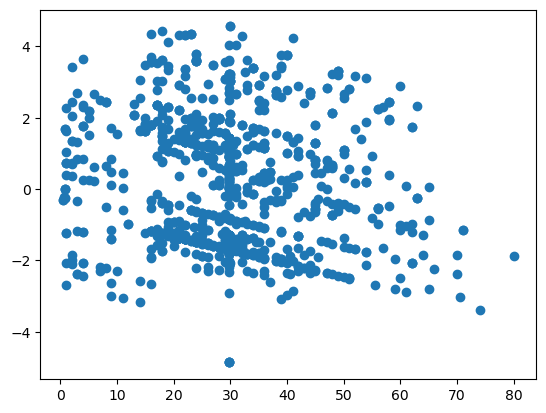

In [67]:
X = data_train_log.drop('Survived', axis=1)
y = data_train_log['Survived']

X = sm.add_constant(X)

logit_result = sm.GLM(y, X, family=Binomial()).fit()

predicted = logit_result.predict(X)

# Get log of odds values
log_odds = np.log(predicted/(1 - predicted))

# Visualize the result
plt.scatter(x=data_train_log['Age'], y=log_odds)

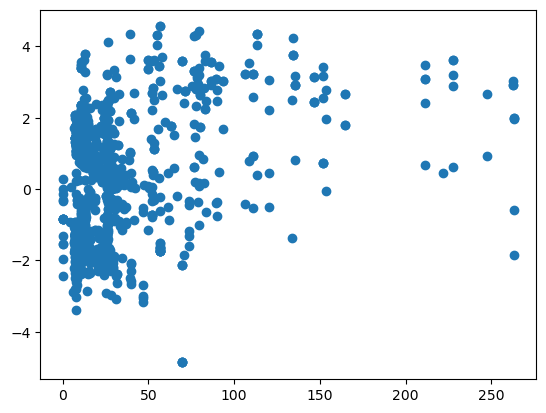

In [68]:
plt.scatter(x=data_train['Fare'], y=log_odds)
plt.show()

- Influence of extreme outlier using cooks distance

In [69]:
from scipy import stats

In [70]:
# Get influence value of each variable
influence = logit_result.get_influence()

# Make a data frame of influence value
summ_df = influence.summary_frame()

# Get only cooks_d columns
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Add absolute standardized residual values
diagnosis_df['std_resid'] = stats.zscore(logit_result.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x : np.abs(x))

# Sort data by cook's distance
diagnosis_df.sort_values('cooks_d', ascending=False).head()

,cooks_d,std_resid
273,0.049433,1.488608
204,0.038266,1.160446
747,0.022697,1.170027
1006,0.022337,0.884446
376,0.021597,1.192871


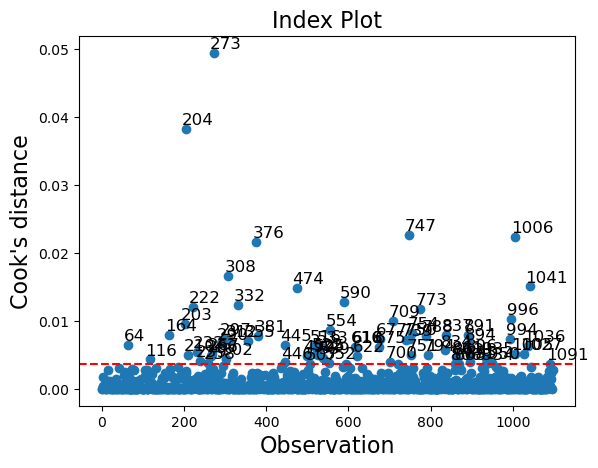

In [71]:
# Determining cook's distance treshold
cook_thresh = 4/len(data_train_log)

# Plotting the cooks distance
fig = influence.plot_index(y_var='cooks', threshold=cook_thresh)
plt.axhline( y = cook_thresh, ls='--', color='red')

In [72]:
# Seeing how much data that exxceed the cooks distance threshold
exceed_data = diagnosis_df[diagnosis_df['cooks_d'] > cook_thresh]
prep_outliers = round((len(exceed_data) / len(diagnosis_df))*100, 1)
print(f'Proportion of data that are highly influential = {prep_outliers}%')

Proportion of data that are highly influential = 6.5%


In [73]:
data_train_log = data_train_log.drop([273, 204])

- Independece of Observation

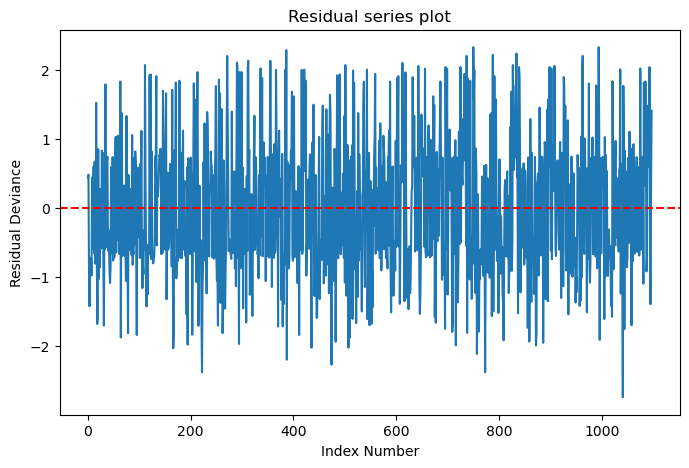

In [74]:
X = data_train_log.drop('Survived', axis = 1)
y = data_train_log['Survived']

X = sm.add_constant(X)

logit_result = sm.GLM(y, X, family=Binomial()).fit()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(title = 'Residual series plot',
                     xlabel = 'Index Number',
                     ylabel = 'Residual Deviance')

ax.plot(data_train_log.index.to_list(),
        stats.zscore(logit_result.resid_deviance))

plt.axhline(y = 0, ls = '--', color = 'red')

No pattern seen from plot above, all observation are already independece

- Conclusion from all asuumption:

1. Target variable consist only have 2 class
2. No multicollinearity
3. Fare and ticket number columns violate linearity assumption
4. No pattern on residual deviance (all observation is independece)

In [75]:
data_train_log.drop(['Fare', 'Ticket_number'], axis=1, inplace=True)

#### Model Building

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [77]:
y_true = pd.read_csv('gender_submission.csv')
y_true.drop('PassengerId', axis=1, inplace=True)
y_true.head(3)

,Survived
0,0
1,1
2,0


In [78]:
data_test_log.drop(['Fare', 'Ticket_number'], axis=1, inplace=True)

In [79]:
X_train = data_train_log.drop('Survived', axis=1)
y_train = data_train_log['Survived']

X_test = data_test_log

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
log_reg = LogisticRegression(random_state=22)

log_reg.fit(X=X_train_scaled, y=y_train)

y_pred = log_reg.predict(X_test_scaled)

Classification Report

In [81]:
metrics.confusion_matrix(y_true, y_pred)

array([[234,  32],
       [  4, 148]], dtype=int64)

In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       266
           1       0.82      0.97      0.89       152

    accuracy                           0.91       418
   macro avg       0.90      0.93      0.91       418
weighted avg       0.92      0.91      0.92       418



### 2. Naive Bayes

#### Model evaluation

- No high correlation between feature

In [83]:
# From FIV number we know theres high correlation between PClass and cabin_let_unknown feature
data_train_naive = data_train.drop('Cabin_let_unknown', axis=1)
data_test_naive = data_test.drop('Cabin_let_unknown', axis=1)

In [84]:
# See if theres hihgly correlation between predictor
data_train_naive.corr()['Age'].sort_values(ascending=False)

Age              1.000000
Cabin_num        0.202559
Cabin_let_D      0.135588
Cabin_let_E      0.110927
Cabin_let_C      0.099366
Cabin_let_B      0.093105
Fare             0.089900
Sex_male         0.056430
Embarked_S      -0.011926
Embarked_Q      -0.029632
Cabin_let_G     -0.069196
Cabin_let_F     -0.077313
Ticket_number   -0.092724
Parch           -0.202884
SibSp           -0.210864
Name: Age, dtype: float64

#### Model Building

In [85]:
X_train = data_train_naive.drop('Survived', axis=1)
y_train = data_train_naive['Survived']

X_test = data_test_naive

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(var_smoothing=1e-8) # Add var smoothing to avoid devided by zero
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)

In [88]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       266
           1       0.57      0.34      0.42       152

    accuracy                           0.67       418
   macro avg       0.63      0.59      0.59       418
weighted avg       0.65      0.67      0.64       418

